In [16]:
!pip install pytesseract

In [17]:
!pip install tesseract

In [21]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\NISARG MEHTA\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

In [64]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

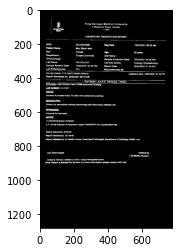

In [65]:
file=r'ocr4.jpeg'
img = cv2.imread(file,0)
img.shape

thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('ocr4.jpeg',img_bin)
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

In [66]:
kernel_len = np.array(img).shape[1]//100

ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

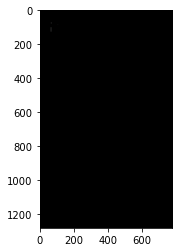

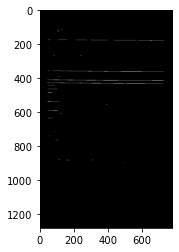

In [67]:

image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("OCR4.jpeg",vertical_lines)

plotting = plt.imshow(image_1,cmap='gray')
plt.show()

image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("OCR4.jpeg",horizontal_lines)

plotting = plt.imshow(image_2,cmap='gray')
plt.show()

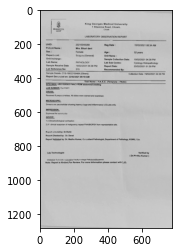

In [68]:
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)

img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("ocr4.jpeg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)

plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

In [69]:
# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    return (cnts, boundingBoxes)

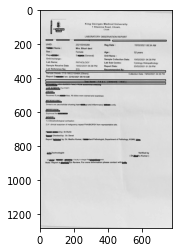

In [70]:
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")


heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]

#Get mean of heights
mean = np.mean(heights)
box = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
        
plotting = plt.imshow(image,cmap='gray')
plt.show()

In [71]:
row=[]
column=[]
j=0


for i in range(len(box)):    
        
    if(i==0):
        column.append(box[i])
        previous=box[i]    
    
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]            
            
            if(i==len(box)-1):
                row.append(column)        
            
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
            
print(column)
print(row)

[[145, 877, 39, 8], [97, 877, 33, 5], [292, 879, 57, 5], [56, 880, 24, 5], [481, 895, 25, 6], [122, 896, 46, 5]]
[[[64, 63, 5, 28], [103, 75, 5, 23], [63, 91, 5, 48], [91, 109, 50, 9], [93, 118, 32, 10]], [[96, 173, 75, 5], [34, 173, 41, 5], [287, 174, 122, 6], [200, 174, 88, 5], [424, 176, 315, 7]], [[44, 221, 26, 5]], [[69, 263, 31, 6], [223, 265, 32, 5]], [[34, 355, 701, 10]], [[97, 389, 34, 5], [33, 408, 702, 10], [33, 425, 702, 10], [35, 440, 64, 5]], [[35, 462, 81, 5]], [[34, 483, 50, 6], [119, 500, 26, 5]], [[34, 536, 91, 6], [239, 553, 23, 5], [375, 554, 31, 5]], [[34, 589, 81, 6], [105, 605, 55, 5]], [[34, 633, 52, 5]], [[74, 714, 27, 5], [42, 714, 24, 5]], [[38, 738, 28, 5], [256, 757, 24, 5], [563, 761, 23, 5], [80, 761, 39, 5]], [[41, 840, 24, 5], [548, 856, 23, 5]], [[145, 877, 39, 8], [97, 877, 33, 5], [292, 879, 57, 5], [56, 880, 24, 5], [481, 895, 25, 6], [122, 896, 46, 5]]]


In [72]:
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]

center=np.array(center)
center.sort()
print(center)

finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)


[ 68 113 145 164 320 493]


In [74]:
import subprocess
import os
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)
                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)

arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row), countcol))
print(dataframe)
data = dataframe.style.set_properties(align="left")
data